In [ ]:
import glob
comments = glob.glob('/content/Comments*.csv')

In [ ]:
import pandas as pd
li = []

for filename in comments:
    df_c = pd.read_csv(filename, index_col=None, header=0, low_memory=False)
    li.append(df_c)

comments_info = pd.concat(li, axis=0, ignore_index=True)

In [ ]:
len(comments_info)

2176364

In [ ]:
comments_info.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial
0,1486065741,58927e0495d0e0392607e1b3,1129.0,ANY anti Trump propaganda from Gaga and my TV ...,21332974.0,21332974.0,<br/>,comment,1.486012e+09,1.0,0,0.0,Sports,0.0,NaN,21332974,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486065741,vilonia,68372461.0,"conway, ar",NaN,NaN,News
1,1486055271,58927e0495d0e0392607e1b3,1129.0,"I'll not watch the SB, nor the grammys or osca...",21332861.0,21332861.0,<br/>,comment,1.486011e+09,1.0,0,0.0,Sports,0.0,NaN,21332861,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055271,Joe Schultz,73635333.0,"Hays, KS",NaN,NaN,News
2,1486055240,58927e0495d0e0392607e1b3,1129.0,"NFL's going to do another ""in-your-face, Ameri...",21332686.0,21332686.0,NaN,comment,1.486009e+09,1.0,0,0.0,Sports,0.0,NaN,21332686,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055240,WilliamPenn2,61340508.0,Tacony,NaN,NaN,News
3,1486055221,58927e0495d0e0392607e1b3,1129.0,I'm continually amazed at the ill-placed crede...,21332622.0,21332622.0,<br/>,comment,1.486008e+09,1.0,0,0.0,Sports,0.0,NaN,21332622,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055221,Jeff Palmer,72632699.0,"Shiloh, IL",NaN,NaN,News
4,1486055214,58927e0495d0e0392607e1b3,1129.0,"Personally, I do not want to see any politics ...",21332516.0,21332516.0,<br/>,comment,1.486007e+09,1.0,0,0.0,Sports,0.0,NaN,21332516,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055214,Matt1234,60683284.0,Seattle,NaN,NaN,News


In [ ]:
import numpy as np
comments_info['y']= np.where((comments_info['replyCount'] == 0.0), 0, 1)

In [ ]:
comments_info.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial,y
0,1486065741,58927e0495d0e0392607e1b3,1129.0,ANY anti Trump propaganda from Gaga and my TV ...,21332974.0,21332974.0,<br/>,comment,1.486012e+09,1.0,0,0.0,Sports,0.0,NaN,21332974,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486065741,vilonia,68372461.0,"conway, ar",NaN,NaN,News,0
1,1486055271,58927e0495d0e0392607e1b3,1129.0,"I'll not watch the SB, nor the grammys or osca...",21332861.0,21332861.0,<br/>,comment,1.486011e+09,1.0,0,0.0,Sports,0.0,NaN,21332861,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055271,Joe Schultz,73635333.0,"Hays, KS",NaN,NaN,News,0
2,1486055240,58927e0495d0e0392607e1b3,1129.0,"NFL's going to do another ""in-your-face, Ameri...",21332686.0,21332686.0,NaN,comment,1.486009e+09,1.0,0,0.0,Sports,0.0,NaN,21332686,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055240,WilliamPenn2,61340508.0,Tacony,NaN,NaN,News,0
3,1486055221,58927e0495d0e0392607e1b3,1129.0,I'm continually amazed at the ill-placed crede...,21332622.0,21332622.0,<br/>,comment,1.486008e+09,1.0,0,0.0,Sports,0.0,NaN,21332622,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055221,Jeff Palmer,72632699.0,"Shiloh, IL",NaN,NaN,News,0
4,1486055214,58927e0495d0e0392607e1b3,1129.0,"Personally, I do not want to see any politics ...",21332516.0,21332516.0,<br/>,comment,1.486007e+09,1.0,0,0.0,Sports,0.0,NaN,21332516,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055214,Matt1234,60683284.0,Seattle,NaN,NaN,News,0


In [ ]:
comments = comments_info[['editorsSelection', 'recommendations', 'replyCount', 'inReplyTo', 'y']]
comments.head()

,editorsSelection,recommendations,replyCount,inReplyTo,y
0,0,0.0,0.0,0.0,0
1,0,0.0,0.0,0.0,0
2,0,0.0,0.0,0.0,0
3,0,0.0,0.0,0.0,0
4,0,0.0,0.0,0.0,0


In [ ]:
X = comments[[ 'recommendations', 'replyCount', 'inReplyTo']]
y = comments['y']

In [ ]:
from sklearn.linear_model import LogisticRegression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import grangercausalitytests

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
pred = logreg.predict(X)
print(len(pred))
print(len(X))

2176364
2176364


In [ ]:
comments['predicted'] = pred
comments.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,editorsSelection,recommendations,replyCount,inReplyTo,y,predicted
0,0,0.0,0.0,0.0,0,0
1,0,0.0,0.0,0.0,0,0
2,0,0.0,0.0,0.0,0,0
3,0,0.0,0.0,0.0,0,0
4,0,0.0,0.0,0.0,0,0


In [ ]:
df = pd.DataFrame(pred)
comments_info['predicted'] = pred
comments_info.head()

,approveDate,articleID,articleWordCount,commentBody,commentID,commentSequence,commentTitle,commentType,createDate,depth,editorsSelection,inReplyTo,newDesk,parentID,parentUserDisplayName,permID,picURL,printPage,recommendations,recommendedFlag,replyCount,reportAbuseFlag,sectionName,sharing,status,timespeople,trusted,updateDate,userDisplayName,userID,userLocation,userTitle,userURL,typeOfMaterial,y,predicted
0,1486065741,58927e0495d0e0392607e1b3,1129.0,ANY anti Trump propaganda from Gaga and my TV ...,21332974.0,21332974.0,<br/>,comment,1.486012e+09,1.0,0,0.0,Sports,0.0,NaN,21332974,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486065741,vilonia,68372461.0,"conway, ar",NaN,NaN,News,0,0
1,1486055271,58927e0495d0e0392607e1b3,1129.0,"I'll not watch the SB, nor the grammys or osca...",21332861.0,21332861.0,<br/>,comment,1.486011e+09,1.0,0,0.0,Sports,0.0,NaN,21332861,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055271,Joe Schultz,73635333.0,"Hays, KS",NaN,NaN,News,0,0
2,1486055240,58927e0495d0e0392607e1b3,1129.0,"NFL's going to do another ""in-your-face, Ameri...",21332686.0,21332686.0,NaN,comment,1.486009e+09,1.0,0,0.0,Sports,0.0,NaN,21332686,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055240,WilliamPenn2,61340508.0,Tacony,NaN,NaN,News,0,0
3,1486055221,58927e0495d0e0392607e1b3,1129.0,I'm continually amazed at the ill-placed crede...,21332622.0,21332622.0,<br/>,comment,1.486008e+09,1.0,0,0.0,Sports,0.0,NaN,21332622,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055221,Jeff Palmer,72632699.0,"Shiloh, IL",NaN,NaN,News,0,0
4,1486055214,58927e0495d0e0392607e1b3,1129.0,"Personally, I do not want to see any politics ...",21332516.0,21332516.0,<br/>,comment,1.486007e+09,1.0,0,0.0,Sports,0.0,NaN,21332516,https://graphics8.nytimes.com/images/apps/time...,12.0,0.0,NaN,0.0,NaN,Pro Football,0,approved,1.0,0.0,1486055214,Matt1234,60683284.0,Seattle,NaN,NaN,News,0,0


In [ ]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.52


In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix) 

[[224248 312759]
 [  2215 113688]]


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.42      0.59    537007
           1       0.27      0.98      0.42    115903

    accuracy                           0.52    652910
   macro avg       0.63      0.70      0.50    652910
weighted avg       0.86      0.52      0.56    652910



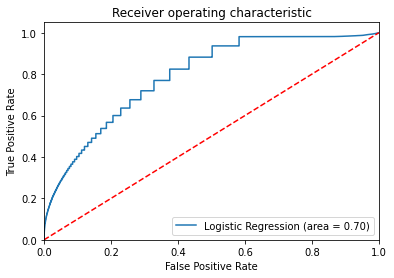

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()